<a href="https://colab.research.google.com/github/kumoromilee/BasicProg_DataViz65/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/Project Dataviz/Project Dataviz')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/Project Dataviz/Project Dataviz


In [ ]:
!ls

2KHwTM.csv	       opendata_living_score  opendata_subdistrict
2KHwTM.gsheet	       opendata_neighborhood  opendata_train_line
opendata_district      opendata_project       opendata_train_station
opendata_eating_score  opendata_province      opendata_unittype


# ราคาบ้านเดี่ยวในกรุงเทพและปริมณฑล พร้อมกับคะแนนอาหารการกินของย่านต่างๆ และคะแนนการเดินทางเข้าถึงสถานที่ต่างๆ ในชีวิตประจำวัน เพื่อประกอบการตัดสินใจซื้อบ้านเดี่ยว

## ข้อมูลที่อยู่อาศัยราย Unit

In [ ]:
open_unit = pd.read_csv('/content/drive/MyDrive/Project Dataviz/Project Dataviz/opendata_unittype/opendata_unittype.csv')
open_unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...


In [ ]:
#Select columns เลือกข้อมูลที่ต้องการใช้
open_unit.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype'],
      dtype='object')

In [ ]:
unit = open_unit[['unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th',
       'area_usable_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility']]
unit.head()

,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_usable_min,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility
0,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,37.3,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,150.0,NaN,NaN,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,28.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,27.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,182.0,NaN,NaN,3.0,2.0,3.0,3.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN


In [ ]:
#เลือกเฉพาะบ้าน
unit_BKK = unit[unit['propertytype_name_en']=='Detached House']

In [ ]:
#เช็ค missing ของ unit
unit_BKK.isnull().any()

unittype_id             False
project_id              False
name_th                  True
propertytype_id         False
propertytype_name_en    False
propertytype_name_th    False
area_usable_min          True
count_airconditioner     True
count_elevator           True
count_floor_internal     True
count_parking            True
count_room_bath          True
count_room_bed           True
count_room_dinning       True
count_room_guest         True
count_room_kitchen       True
count_room_living        True
count_room_maid          True
count_room_storage       True
count_room_utility       True
dtype: bool

In [ ]:
#fill NA with Text ใส่เป็น Unknown เพราะเป็น string และไม่ทราบค่า
unit_BKK['name_th'] = unit_BKK['name_th'].fillna('Unknown')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# จำนวนชั้นในบ้าน จำเป็นต้องใส่ 1 เพราะบ้านจำเป็นต้องมีชั้นอย่างน้อย 1 ชั้น
unit_BKK[['count_floor_internal']]  = unit_BKK[['count_floor_internal']].fillna(1) 
# จำนวนห้อง, จำนวนลิฟต์, จำนวนแอร์, จำนวนที่จอดรถ ใส่ 0 เพราะบางบ้านอาจจะไม่จำเป็นต้องมี
unit_BKK[['count_airconditioner','count_elevator','count_parking','count_room_bath','count_room_bed','count_room_dinning','count_room_guest','count_room_kitchen','count_room_living','count_room_maid','count_room_storage','count_room_utility',]]  = unit_BKK[['count_airconditioner','count_elevator','count_parking','count_room_bath','count_room_bed','count_room_dinning','count_room_guest','count_room_kitchen','count_room_living','count_room_maid','count_room_storage','count_room_utility']].fillna(0) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# พื้นที่ใช้สอย
unit_BKK[['area_usable_min']] = unit_BKK[['area_usable_min']].fillna('0')

In [ ]:
unit_BKK.isnull().any() #เช็ค missing อีกครั้ง

unittype_id             False
project_id              False
name_th                 False
propertytype_id         False
propertytype_name_en    False
propertytype_name_th    False
area_usable_min         False
count_airconditioner    False
count_elevator          False
count_floor_internal    False
count_parking           False
count_room_bath         False
count_room_bed          False
count_room_dinning      False
count_room_guest        False
count_room_kitchen      False
count_room_living       False
count_room_maid         False
count_room_storage      False
count_room_utility      False
dtype: bool

In [ ]:
unit_BKK

,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_usable_min,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility
5,unittype_8026,project_2694,Luciano Grand,1,Detached House,บ้าน,198.0,0.0,0.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,unittype_14501,project_5799,บ้านเดี่ยวสองชั้น Type A,1,Detached House,บ้าน,0,4.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6215b4a7a441d30014e1f02f,6215b1cfc1620300140bc087,บ้านเดี่ยวชั้นเดียว Type C,1,Detached House,บ้าน,80.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,unittype_34564,project_14884,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,unittype_8521,project_2906,New Villa Valdivia,1,Detached House,บ้าน,441.0,0.0,0.0,3.0,3.0,6.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42619,unittype_34884,project_15005,Ametrine,1,Detached House,บ้าน,353.0,0.0,0.0,2.0,3.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
42620,unittype_38508,project_16864,Canola,1,Detached House,บ้าน,157.0,0.0,0.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
42621,unittype_14016,project_5275,Grandeur,1,Detached House,บ้าน,223.0,0.0,0.0,2.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42623,unittype_37375,project_16389,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,180.0,0.0,0.0,1.0,1.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## ข้อมูลที่อยู่อาศัยรายโครงการ Project

In [ ]:
open_project = pd.read_csv('/content/drive/MyDrive/Project Dataviz/Project Dataviz/opendata_project/opendata_project.csv')
open_project

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23429,12883.0,project_12317,Baan Klangmeung Urbanion Ladphrao-Chokchai 4,บ้านกลางเมือง เออร์บาเนี่ยน ลาดพร้าว-โชคชัย 4,3,Townhome,ทาวน์โฮม,5700000.0,developer_1760,"AP (Thailand) Co,. Ltd",...,NaN,1.0,1.0,NaN,1.0,2017-12-06 13:10:23,1970-01-02 07:00:00,2020-12-04 10:42:15,baania,https://baania.com/th/project/บ้านกลางเมือง-เอ...
23430,21181.0,project_12057,@Home Kaset-Nawamin,แอทโฮม เกษตร-นวมินทร์,3,Townhome,ทาวน์โฮม,3590000.0,developer_1793,"Areeya Property Co.,Ltd.",...,NaN,NaN,NaN,NaN,1.0,2017-11-30 11:12:12,1970-01-02 07:00:00,2022-06-06 16:30:06,baania,https://baania.com/th/project/แอทโฮม-เกษตร-นวม...
23431,13993.0,project_4461,I-Design Wongwaen-Ramintra,ไอ-ดีไซน์ วงแหวน-รามอินทรา,4,Commercial,อาคารพาณิชย์,1870000.0,developer_2217,"Wangthong Group Pub Co., Ltd.",...,NaN,1.0,1.0,NaN,1.0,2017-03-02 11:07:30,2014-12-31 07:00:00,2020-12-04 10:42:33,baania,https://baania.com/th/project/ไอ-ดีไซน์-วงแหวน...
23432,5889.0,project_144,Koolpunt Ville 15 Park Avenue,กุลพันธ์วิลล์ 15 พาร์ค อเวนิว,1,Detached House,บ้าน,4000000.0,developer_1004,"Homeland Service Co., Ltd.",...,NaN,1.0,1.0,1.0,1.0,2015-09-28 09:00:28,2020-01-01 07:00:00,2022-01-10 15:00:13,baania,https://baania.com/th/project/กุลพันธ์วิลล์-15...


In [ ]:
#Select columns
open_project.columns

Index(['row_number', 'project_id', 'name_en', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'price_min',
       'developer_id', 'developer_name_en', 'developer_name_th', 'latitude',
       'longitude', 'neighborhood_id', 'neighborhood_name_en',
       'neighborhood_name_th', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'zipcode', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_tower',
       'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security',
       'date_created', 'date_finish', 'date_updated', 'source', 'url_project'],
      dtype='object')

In [ ]:
project = open_project[['project_id',  'name_en',  'propertytype_id',
       'propertytype_name_en', 'price_min',
       'developer_id', 'developer_name_en', 'neighborhood_id', 'neighborhood_name_en',
       'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 
       'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security']]

In [ ]:
#เลือกมาเฉพาะจังหวัดกรุงเทพ
province_BKK = project[project['province_name_th']=='กรุงเทพมหานคร']

In [ ]:
province_BKK

,project_id,name_en,propertytype_id,propertytype_name_en,price_min,developer_id,developer_name_en,neighborhood_id,neighborhood_name_en,subdistrict_id,...,count_parking,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
5,project_15884,H2 Wood,2,Condo,1480000.0,developer_1789,"Asset Wise Pub Co., Ltd.",B1079,RAM IN THRA,3864.0,...,NaN,79.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
8,project_6637,Lumpini Place Rama 4-Sathorn,2,Condo,1990000.0,developer_1745,"L.P.N.Development PCL Co., Ltd.",B1232,YEN AKAT,3940.0,...,NaN,231.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0
11,project_16422,Loet Ubon 4,3,Townhome,1800000.0,developer_10510,NaN,B1085,LIAP DUAN RAM IN THRA,3958.0,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,60596713423c910014e3e723,The Master @BTS Onnut - Pattanakarn,4,Commercial,11000000.0,developer_5743,NaN,B1046,ON NUT PHATTHANAKAN,3902.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
15,project_8322,Baan Pudsorn 11,1,Detached House,10800000.0,developer_10510,NaN,B1151,CHINNAKHET,3999.0,...,NaN,65.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23424,614ab02bc4d52b0013a6fce4,Baan Ampornplace 2 Sukhaphiban 5,3,Townhome,0.0,developer_10510,NaN,B1078,WATCHARA PHON,3984.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23426,project_14944,Perfect residence krungthep-kreetha,1,Detached House,10900000.0,developer_1751,"PROPERTY PERFECT PUB CO., LTD.",B1055,KHEHA ROMKLAO,3953.0,...,NaN,39.0,3.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0
23429,project_12317,Baan Klangmeung Urbanion Ladphrao-Chokchai 4,3,Townhome,5700000.0,developer_1760,"AP (Thailand) Co,. Ltd",B1082,LAT PHRAO,3958.0,...,NaN,123.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0
23430,project_12057,@Home Kaset-Nawamin,3,Townhome,3590000.0,developer_1793,"Areeya Property Co.,Ltd.",B1088,KASET NAWA MIN,3958.0,...,NaN,55.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
#เช็ค missing ของ province_BKK
province_BKK.isnull().any()

project_id                False
name_en                   False
propertytype_id           False
propertytype_name_en      False
price_min                  True
developer_id              False
developer_name_en          True
neighborhood_id           False
neighborhood_name_en      False
subdistrict_id            False
subdistrict_name_en       False
subdistrict_name_th       False
district_id               False
district_name_en          False
district_name_th          False
province_id               False
province_name_en          False
province_name_th          False
count_elevator             True
count_elevator_service     True
count_floor                True
count_parking              True
count_unit                 True
count_unittype             True
facility_clubhouse         True
facility_fitness           True
facility_meeting           True
facility_park              True
facility_playground        True
facility_pool              True
facility_security          True
dtype: b

In [ ]:
# price_min ราคาต่ำสุดโครงการ
print(len(province_BKK[province_BKK['price_min'].isnull()])) #we used dropna() เพราะมีrow น้อยเมื่อเทียบกับจำนวนข้อมูล
province_BKK = province_BKK.dropna(subset=['price_min'])

17


In [ ]:
# subdistrict_id รหัสย่าน
print(len(province_BKK[province_BKK['subdistrict_id'].isnull()])) 
province_BKK = province_BKK.dropna(subset=['subdistrict_id'])

0


In [ ]:
#fill NA with Text
province_BKK['developer_name_en'] = province_BKK['developer_name_en'].fillna('Unknown') # มีแต่ไม่รู้ว่าคืออะไร
province_BKK['neighborhood_id'] = province_BKK['neighborhood_id'].fillna('Unknown') #รหัสย่าน 
province_BKK['neighborhood_name_en'] = province_BKK['neighborhood_name_en'].fillna('Unknown') 

In [ ]:
# จำนวนลิฟต์และชั้น
province_BKK[['count_floor', 'count_unit','count_unittype']]  = province_BKK[['count_floor', 'count_unit','count_unittype']].fillna(1) #จำนวนชั้นของตัวโครงการ, จำนวนยูนิตในโครงการ, จำนวนแบบบ้านในโครงการ ถ้าเขาไม่กรอกมันเป็นไปไม่ได้ที่จะมี0ชั้น จึงแทนเป็น1
province_BKK[['count_elevator','count_floor','count_parking', 'count_elevator_service']] = province_BKK[['count_elevator','count_floor','count_parking', 'count_elevator_service']].fillna(0) # เช่นแอร์ อาจจะไม่มีก็ได้
# สิ่งอำนวยความสะดวก
province_BKK[['facility_clubhouse','facility_fitness','facility_meeting','facility_park','facility_playground','facility_pool','facility_security']] = province_BKK[['facility_clubhouse','facility_fitness','facility_meeting','facility_park','facility_playground','facility_pool','facility_security']].fillna(0) 

In [ ]:
province_BKK.isnull().any()

project_id                False
name_en                   False
propertytype_id           False
propertytype_name_en      False
price_min                 False
developer_id              False
developer_name_en         False
neighborhood_id           False
neighborhood_name_en      False
subdistrict_id            False
subdistrict_name_en       False
subdistrict_name_th       False
district_id               False
district_name_en          False
district_name_th          False
province_id               False
province_name_en          False
province_name_th          False
count_elevator            False
count_elevator_service    False
count_floor               False
count_parking             False
count_unit                False
count_unittype            False
facility_clubhouse        False
facility_fitness          False
facility_meeting          False
facility_park             False
facility_playground       False
facility_pool             False
facility_security         False
dtype: b

## คะแนนเกี่ยวกับอาหารการกินของย่าน (Subdistrict) ต่างๆ

In [ ]:
open_eat = pd.read_csv('/content/drive/MyDrive/Project Dataviz/Project Dataviz/opendata_eating_score/opendata_eating_score.csv')
open_eat.head()

,row_number,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety,source,day
0,145,1007,CHANG KHLAN,ช้างคลาน,1006,MUEANG CHIANG MAI,เมืองเชียงใหม่,1005,Chiang Mai,เชียงใหม่,64.0,48.0,62.0,97.0,73.0,41.0,70.0,92.0,baania,2022-09-30
1,102,3941,BANG PHONGPHANG,บางโพงพาง,3939,YAN NAWA,ยานนาวา,3781,Bangkok,กรุงเทพมหานคร,71.0,73.0,64.0,82.0,73.0,62.0,65.0,85.0,baania,2022-09-30
2,64,3829,CHIMPHLI,ฉิมพลี,3826,TALING CHAN,ตลิ่งชัน,3781,Bangkok,กรุงเทพมหานคร,73.0,84.0,65.0,72.0,70.0,77.0,60.0,73.0,baania,2022-09-30
3,96,3503,BANG DUAN,บางด้วน,3499,MUEANG SAMUT PRAKAN,เมืองสมุทรปราการ,3498,Samut Prakan,สมุทรปราการ,79.0,93.0,93.0,21.0,62.0,76.0,69.0,49.0,baania,2022-09-30
4,17,2624,RAWAI,ราไวย์,2617,MUEANG PHUKET,เมืองภูเก็ต,2616,Phuket,ภูเก็ต,52.0,73.0,36.0,52.0,48.0,67.0,34.0,48.0,baania,2022-09-30


In [ ]:
#Select columns
open_eat.columns

Index(['row_number', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'eating_daytime', 'eating_daytime_price',
       'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime',
       'eating_nighttime_price', 'eating_nighttime_quality',
       'eating_nighttime_variety', 'source', 'day'],
      dtype='object')

In [ ]:
eat = open_eat[['subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'eating_daytime', 'eating_daytime_price',
       'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime',
       'eating_nighttime_price', 'eating_nighttime_quality',
       'eating_nighttime_variety']]
eat.head()

,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety
0,1007,CHANG KHLAN,ช้างคลาน,1006,MUEANG CHIANG MAI,เมืองเชียงใหม่,1005,Chiang Mai,เชียงใหม่,64.0,48.0,62.0,97.0,73.0,41.0,70.0,92.0
1,3941,BANG PHONGPHANG,บางโพงพาง,3939,YAN NAWA,ยานนาวา,3781,Bangkok,กรุงเทพมหานคร,71.0,73.0,64.0,82.0,73.0,62.0,65.0,85.0
2,3829,CHIMPHLI,ฉิมพลี,3826,TALING CHAN,ตลิ่งชัน,3781,Bangkok,กรุงเทพมหานคร,73.0,84.0,65.0,72.0,70.0,77.0,60.0,73.0
3,3503,BANG DUAN,บางด้วน,3499,MUEANG SAMUT PRAKAN,เมืองสมุทรปราการ,3498,Samut Prakan,สมุทรปราการ,79.0,93.0,93.0,21.0,62.0,76.0,69.0,49.0
4,2624,RAWAI,ราไวย์,2617,MUEANG PHUKET,เมืองภูเก็ต,2616,Phuket,ภูเก็ต,52.0,73.0,36.0,52.0,48.0,67.0,34.0,48.0


In [ ]:
#เช็ค missing ของ eat
eat.isnull().any()

subdistrict_id              False
subdistrict_name_en         False
subdistrict_name_th         False
district_id                 False
district_name_en            False
district_name_th            False
province_id                 False
province_name_en            False
province_name_th            False
eating_daytime              False
eating_daytime_price        False
eating_daytime_quality      False
eating_daytime_variety      False
eating_nighttime            False
eating_nighttime_price      False
eating_nighttime_quality    False
eating_nighttime_variety    False
dtype: bool

In [ ]:
#เลือกเฉพาะกรุงเทพ
eat_BKK = eat[eat['province_name_th']=='กรุงเทพมหานคร']

In [ ]:
eat_BKK

,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety
1,3941,BANG PHONGPHANG,บางโพงพาง,3939,YAN NAWA,ยานนาวา,3781,Bangkok,กรุงเทพมหานคร,71.0,73.0,64.0,82.0,73.0,62.0,65.0,85.0
2,3829,CHIMPHLI,ฉิมพลี,3826,TALING CHAN,ตลิ่งชัน,3781,Bangkok,กรุงเทพมหานคร,73.0,84.0,65.0,72.0,70.0,77.0,60.0,73.0
6,3887,BANG RAK,บางรัก,3886,BANG RAK,บางรัก,3781,Bangkok,กรุงเทพมหานคร,68.0,60.0,62.0,96.0,76.0,52.0,65.0,97.0
8,3948,RAT BURANA,ราษฎร์บูรณะ,3947,RAT BURANA,ราษฎร์บูรณะ,3781,Bangkok,กรุงเทพมหานคร,64.0,81.0,51.0,65.0,61.0,72.0,50.0,62.0
10,3838,BANG MOT,บางมด,3806,CHOM THONG,จอมทอง,3781,Bangkok,กรุงเทพมหานคร,73.0,85.0,68.0,63.0,66.0,80.0,56.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,3910,WAT SOMMANAT,วัดโสมนัส,3905,POM PRAP SATTRU PHAI,ป้อมปราบศัตรูพ่าย,3781,Bangkok,กรุงเทพมหานคร,68.0,77.0,60.0,68.0,73.0,64.0,62.0,84.0
546,3794,BANG CHAN,บางชัน,3791,KHLONG SAM WA,คลองสามวา,3781,Bangkok,กรุงเทพมหานคร,58.0,85.0,35.0,61.0,56.0,81.0,27.0,61.0
547,3976,TALAT NOI,ตลาดน้อย,3973,SAMPHANTHAWONG,สัมพันธวงศ์,3781,Bangkok,กรุงเทพมหานคร,63.0,53.0,62.0,85.0,71.0,56.0,63.0,85.0
548,3978,THUNG MAHAMEK,ทุ่งมหาเมฆ,3977,SATHON,สาทร,3781,Bangkok,กรุงเทพมหานคร,69.0,63.0,60.0,98.0,78.0,55.0,68.0,97.0


##คะแนนการเดินทางเข้าถึงสถานที่ ในชีวิตประจำวันของพื้นที่ต่างๆ โดยคำนวณจาก 3 รูปแบบการเดินทาง และ 5 ประเภทของสถานที่เป้าหมายเพื่อการดำเนินชีวิตในแต่ละวัน
### คะแนนการเดินทางเข้าถึงสถานที่ คือ ความสะดวกต่างๆ เช่น ทางเดินเท้าดี หลอดไฟเยอะ สว่าง เป็นต้น
### 3 รูปแบบการเดินทาง : เดิน, ใช้ขนส่งสาธารณะ และรถส่วนตัว### 
### คะแนนสถานที่ คือ ความสะดวก ความใกล้ที่ต่างๆ เช่น อยู่ใกล้ รร ที่ทำงานเป็นต้น
### 5 ประเภทของสถานที่ : พักผ่อนหย่อนใจ, สถานที่บริการสาธารณะ, สถานศึกษา, shopping และแหล่งทำงาน

In [ ]:
open_living = pd.read_csv('/content/drive/MyDrive/Project Dataviz/Project Dataviz/opendata_living_score/opendata_living_score.csv')
open_living.head()

,row_number,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,...,access_train,access_total,drive_leisure,drive_public_service,drive_school,drive_shopping,drive_work,drive_total,source,day
0,634,3410,SANO LOI,โสนลอย,3402,BANG BUA THONG,บางบัวทอง,3372,Nonthaburi,นนทบุรี,...,1.0,79.0,100.0,100.0,100.0,100.0,100.0,100.0,baania,2022-09-30
1,619,3976,TALAT NOI,ตลาดน้อย,3973,SAMPHANTHAWONG,สัมพันธวงศ์,3781,Bangkok,กรุงเทพมหานคร,...,100.0,100.0,100.0,87.0,100.0,100.0,100.0,99.0,baania,2022-09-30
2,284,4669,BAN KAO,บ้านเก่า,4663,PHAN THONG,พานทอง,4616,Chon Buri,ชลบุรี,...,0.0,0.0,79.0,91.0,86.0,84.0,93.0,85.0,baania,2022-09-30
3,209,2647,BAN THUM,บ้านทุ่ม,2638,MUEANG KHON KAEN,เมืองขอนแก่น,2637,Khon Kaen,ขอนแก่น,...,0.0,0.0,73.0,65.0,73.0,57.0,47.0,62.0,baania,2022-09-30
4,615,3799,RAM INTHRA,รามอินทรา,3797,KHAN NA YAO,คันนายาว,3781,Bangkok,กรุงเทพมหานคร,...,5.0,39.0,99.0,61.0,99.0,90.0,84.0,89.0,baania,2022-09-30


In [ ]:
#Select columns
open_living.columns

Index(['row_number', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'walk_leisure', 'walk_public_service',
       'walk_school', 'walk_shopping', 'walk_work', 'walk_total',
       'access_boat', 'access_bus', 'access_train', 'access_total',
       'drive_leisure', 'drive_public_service', 'drive_school',
       'drive_shopping', 'drive_work', 'drive_total', 'source', 'day'],
      dtype='object')

In [ ]:
living = open_living[['subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'walk_leisure', 'walk_public_service',
       'walk_school', 'walk_shopping', 'walk_work', 'walk_total',
       'access_boat', 'access_bus', 'access_train', 'access_total',
       'drive_leisure', 'drive_public_service', 'drive_school',
       'drive_shopping', 'drive_work', 'drive_total']]

In [ ]:
#เช็ค missing ของ living
living.isnull().any()

subdistrict_id          False
subdistrict_name_en     False
subdistrict_name_th     False
district_id             False
district_name_en        False
district_name_th        False
province_id             False
province_name_en        False
province_name_th        False
walk_leisure            False
walk_public_service     False
walk_school             False
walk_shopping           False
walk_work               False
walk_total              False
access_boat             False
access_bus              False
access_train            False
access_total            False
drive_leisure           False
drive_public_service    False
drive_school            False
drive_shopping          False
drive_work              False
drive_total             False
dtype: bool

In [ ]:
#เลือกเฉพาะกรุงเทพ
living_BKK = living[living['province_name_th']=='กรุงเทพมหานคร']

In [ ]:
living_BKK

,subdistrict_id,subdistrict_name_en,subdistrict_name_th,district_id,district_name_en,district_name_th,province_id,province_name_en,province_name_th,walk_leisure,...,access_boat,access_bus,access_train,access_total,drive_leisure,drive_public_service,drive_school,drive_shopping,drive_work,drive_total
1,3976,TALAT NOI,ตลาดน้อย,3973,SAMPHANTHAWONG,สัมพันธวงศ์,3781,Bangkok,กรุงเทพมหานคร,100.0,...,100.0,100.0,100.0,100.0,100.0,87.0,100.0,100.0,100.0,99.0
4,3799,RAM INTHRA,รามอินทรา,3797,KHAN NA YAO,คันนายาว,3781,Bangkok,กรุงเทพมหานคร,89.0,...,1.0,94.0,5.0,39.0,99.0,61.0,99.0,90.0,84.0,89.0
5,3875,BANG SUE,บางซื่อ,3874,BANG SUE,บางซื่อ,3781,Bangkok,กรุงเทพมหานคร,99.0,...,99.0,99.0,96.0,99.0,100.0,83.0,100.0,97.0,91.0,96.0
9,3954,KHLONG SAM PRAWET,คลองสามประเวศ,3950,LAT KRABANG,ลาดกระบัง,3781,Bangkok,กรุงเทพมหานคร,95.0,...,55.0,88.0,1.0,57.0,99.0,55.0,100.0,75.0,57.0,79.0
18,3951,LAT KRABANG,ลาดกระบัง,3950,LAT KRABANG,ลาดกระบัง,3781,Bangkok,กรุงเทพมหานคร,75.0,...,92.0,97.0,1.0,76.0,92.0,53.0,98.0,98.0,88.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,3872,BANG PHAI,บางไผ่,3869,BANG KHAE,บางแค,3781,Bangkok,กรุงเทพมหานคร,73.0,...,1.0,82.0,1.0,34.0,90.0,51.0,96.0,77.0,57.0,77.0
698,3883,BANG BAMRU,บางบำหรุ,3881,BANG PHLAT,บางพลัด,3781,Bangkok,กรุงเทพมหานคร,100.0,...,1.0,99.0,94.0,59.0,100.0,71.0,100.0,99.0,97.0,96.0
699,3933,BANG WAEK,บางแวก,3928,PHASI CHAROEN,ภาษีเจริญ,3781,Bangkok,กรุงเทพมหานคร,86.0,...,80.0,88.0,9.0,69.0,100.0,62.0,99.0,77.0,65.0,81.0
700,3935,PAK KHLONG PHASI CHAROEN,ปากคลองภาษีเจริญ,3928,PHASI CHAROEN,ภาษีเจริญ,3781,Bangkok,กรุงเทพมหานคร,93.0,...,100.0,92.0,4.0,77.0,99.0,69.0,100.0,81.0,98.0,87.0


## Merge ตารางเข้าด้วยกัน

In [ ]:
unit_BKK.columns

Index(['unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_usable_min',
       'count_airconditioner', 'count_elevator', 'count_floor_internal',
       'count_parking', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count_room_utility'],
      dtype='object')

In [ ]:
#เช็ค missing
unit_BKK.isnull().any()

unittype_id             False
project_id              False
name_th                 False
propertytype_id         False
propertytype_name_en    False
propertytype_name_th    False
area_usable_min         False
count_airconditioner    False
count_elevator          False
count_floor_internal    False
count_parking           False
count_room_bath         False
count_room_bed          False
count_room_dinning      False
count_room_guest        False
count_room_kitchen      False
count_room_living       False
count_room_maid         False
count_room_storage      False
count_room_utility      False
dtype: bool

In [ ]:
province_BKK.columns

Index(['project_id', 'name_en', 'propertytype_id', 'propertytype_name_en',
       'price_min', 'developer_id', 'developer_name_en', 'neighborhood_id',
       'neighborhood_name_en', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th', 'district_id', 'district_name_en',
       'district_name_th', 'province_id', 'province_name_en',
       'province_name_th', 'count_elevator', 'count_elevator_service',
       'count_floor', 'count_parking', 'count_unit', 'count_unittype',
       'facility_clubhouse', 'facility_fitness', 'facility_meeting',
       'facility_park', 'facility_playground', 'facility_pool',
       'facility_security'],
      dtype='object')

In [ ]:
#เช็ค missing
province_BKK.isnull().any()

project_id                False
name_en                   False
propertytype_id           False
propertytype_name_en      False
price_min                 False
developer_id              False
developer_name_en         False
neighborhood_id           False
neighborhood_name_en      False
subdistrict_id            False
subdistrict_name_en       False
subdistrict_name_th       False
district_id               False
district_name_en          False
district_name_th          False
province_id               False
province_name_en          False
province_name_th          False
count_elevator            False
count_elevator_service    False
count_floor               False
count_parking             False
count_unit                False
count_unittype            False
facility_clubhouse        False
facility_fitness          False
facility_meeting          False
facility_park             False
facility_playground       False
facility_pool             False
facility_security         False
dtype: b

In [ ]:
# select columns 
unit_BKK = unit_BKK[['unittype_id', 'project_id', 'name_th','area_usable_min','count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility']]
unit_BKK.head(3)

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator,count_floor_internal,count_parking,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility
5,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,unittype_14501,project_5799,บ้านเดี่ยวสองชั้น Type A,0,4.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6215b4a7a441d30014e1f02f,6215b1cfc1620300140bc087,บ้านเดี่ยวชั้นเดียว Type C,80.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#พบว่าชื่อ columns ซ้ำกัน
# count_parking
# count_elevator

#เปลี่ยนชื่อ columns
unit_BKK.rename(columns={'count_parking': 'count_parking_unittype', 'count_elevator': 'count_elevator_unittype'}, inplace=True)
unit_BKK.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,count_room_dinning,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility
5,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,unittype_14501,project_5799,บ้านเดี่ยวสองชั้น Type A,0,4.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6215b4a7a441d30014e1f02f,6215b1cfc1620300140bc087,บ้านเดี่ยวชั้นเดียว Type C,80.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#merge ตาราง unit_BKK และ province_BKK เข้าด้วยกันเพื่อให้ได้ข้อมูลบ้านเดี่ยวในกรุงเทพ
unit_project = unit_BKK.merge(province_BKK, how ='left', left_on='project_id', right_on='project_id')
unit_project

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,...,count_parking,count_unit,count_unittype,facility_clubhouse,facility_fitness,facility_meeting,facility_park,facility_playground,facility_pool,facility_security
0,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,...,0,138.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,unittype_14501,project_5799,บ้านเดี่ยวสองชั้น Type A,0,4.0,0.0,2.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6215b4a7a441d30014e1f02f,6215b1cfc1620300140bc087,บ้านเดี่ยวชั้นเดียว Type C,80.0,0.0,0.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unittype_34564,project_14884,บ้านเดี่ยวชั้นเดียว,0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,unittype_8521,project_2906,New Villa Valdivia,441.0,0.0,0.0,3.0,3.0,6.0,5.0,...,0,52.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,unittype_34884,project_15005,Ametrine,353.0,0.0,0.0,2.0,3.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18120,unittype_38508,project_16864,Canola,157.0,0.0,0.0,2.0,2.0,3.0,3.0,...,0,272.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
18121,unittype_14016,project_5275,Grandeur,223.0,0.0,0.0,2.0,0.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18122,unittype_37375,project_16389,บ้านเดี่ยวชั้นเดียว,180.0,0.0,0.0,1.0,1.0,4.0,5.0,...,0,160.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#เช็ค missing
unit_project.isnull().any()

unittype_id                False
project_id                 False
name_th                    False
area_usable_min            False
count_airconditioner       False
count_elevator_unittype    False
count_floor_internal       False
count_parking_unittype     False
count_room_bath            False
count_room_bed             False
count_room_dinning         False
count_room_guest           False
count_room_kitchen         False
count_room_living          False
count_room_maid            False
count_room_storage         False
count_room_utility         False
name_en                     True
propertytype_id             True
propertytype_name_en        True
price_min                   True
developer_id                True
developer_name_en           True
neighborhood_id             True
neighborhood_name_en        True
subdistrict_id              True
subdistrict_name_en         True
subdistrict_name_th         True
district_id                 True
district_name_en            True
district_n

In [ ]:
#พบปัญหาว่ามี missing โผล่มา เลยต้องทำการแก้ missing อีกครั้ง

In [ ]:
# price_min ราคาต่ำสุดโครงการ
print(len(unit_project[unit_project['price_min'].isnull()])) #we used dropna() เพราะมีrow น้อยเมื่อเทียบกับจำนวนข้อมูล
unit_project = unit_project.dropna(subset=['price_min'])

14256


In [ ]:
# subdistrict_id รหัสย่าน
print(len(unit_project[unit_project['subdistrict_id'].isnull()])) 
unit_project = unit_project.dropna(subset=['subdistrict_id'])

0


In [ ]:
#fill NA with Text
unit_project['developer_name_en'] = unit_project['developer_name_en'].fillna('Unknown') # มีแต่ไม่รู้ว่าคืออะไร
unit_project['neighborhood_id'] = unit_project['neighborhood_id'].fillna('Unknown') #รหัสย่าน 
unit_project['neighborhood_name_en'] = unit_project['neighborhood_name_en'].fillna('Unknown') 

In [ ]:
# จำนวนลิฟต์และชั้น
unit_project[['count_floor', 'count_unit','count_unittype']]  = unit_project[['count_floor', 'count_unit','count_unittype']].fillna(1) #จำนวนชั้นของตัวโครงการ, จำนวนยูนิตในโครงการ, จำนวนแบบบ้านในโครงการ ถ้าเขาไม่กรอกมันเป็นไปไม่ได้ที่จะมี0ชั้น จึงแทนเป็น1
unit_project[['count_elevator','count_floor','count_parking', 'count_elevator_service']] = unit_project[['count_elevator','count_floor','count_parking', 'count_elevator_service']].fillna(0) # เช่นแอร์ อาจจะไม่มีก็ได้
# สิ่งอำนวยความสะดวก
unit_project[['facility_clubhouse','facility_fitness','facility_meeting','facility_park','facility_playground','facility_pool','facility_security']] = unit_project[['facility_clubhouse','facility_fitness','facility_meeting','facility_park','facility_playground','facility_pool','facility_security']].fillna(0) 

In [ ]:
#เช็ค missing
unit_project.isnull().any()

unittype_id                False
project_id                 False
name_th                    False
area_usable_min            False
count_airconditioner       False
count_elevator_unittype    False
count_floor_internal       False
count_parking_unittype     False
count_room_bath            False
count_room_bed             False
count_room_dinning         False
count_room_guest           False
count_room_kitchen         False
count_room_living          False
count_room_maid            False
count_room_storage         False
count_room_utility         False
name_en                    False
propertytype_id            False
propertytype_name_en       False
price_min                  False
developer_id               False
developer_name_en          False
neighborhood_id            False
neighborhood_name_en       False
subdistrict_id             False
subdistrict_name_en        False
subdistrict_name_th        False
district_id                False
district_name_en           False
district_n

In [ ]:
unit_project.columns

Index(['unittype_id', 'project_id', 'name_th', 'area_usable_min',
       'count_airconditioner', 'count_elevator_unittype',
       'count_floor_internal', 'count_parking_unittype', 'count_room_bath',
       'count_room_bed', 'count_room_dinning', 'count_room_guest',
       'count_room_kitchen', 'count_room_living', 'count_room_maid',
       'count_room_storage', 'count_room_utility', 'name_en',
       'propertytype_id', 'propertytype_name_en', 'price_min', 'developer_id',
       'developer_name_en', 'neighborhood_id', 'neighborhood_name_en',
       'subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_unit',
       'count_unittype', 'facility_clubhouse', 'facility_fitness',
       'facility_meeting', 'facility_park', 'facility_playground',
       'facility_pool', 'f

In [ ]:
eat_BKK.columns

Index(['subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'eating_daytime',
       'eating_daytime_price', 'eating_daytime_quality',
       'eating_daytime_variety', 'eating_nighttime', 'eating_nighttime_price',
       'eating_nighttime_quality', 'eating_nighttime_variety'],
      dtype='object')

In [ ]:
# select columns เพื่อไม่ให้เกิด column ซ้ำ
eat_BKK = eat_BKK[['subdistrict_id', 'district_id','province_id', 'eating_daytime',
       'eating_daytime_price', 'eating_daytime_quality','eating_daytime_variety', 'eating_nighttime', 
       'eating_nighttime_price', 'eating_nighttime_quality', 'eating_nighttime_variety']]

In [ ]:
#merge unit_project เข้ากับ eat เพื่อให้มีข้อมูลคะแนนการกินเข้ามา
unit_project_eat = unit_project.merge(eat_BKK, how ='left', left_on=['subdistrict_id','district_id','province_id',], right_on=['subdistrict_id','district_id','province_id',]) 
unit_project_eat

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,...,facility_pool,facility_security,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety
0,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,...,1.0,1.0,73.0,85.0,68.0,62.0,65.0,80.0,54.0,63.0
1,unittype_8521,project_2906,New Villa Valdivia,441.0,0.0,0.0,3.0,3.0,6.0,5.0,...,1.0,1.0,58.0,78.0,34.0,75.0,62.0,74.0,29.0,76.0
2,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,1.0,1.0,71.0,67.0,65.0,92.0,76.0,57.0,69.0,91.0
3,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,1.0,1.0,71.0,67.0,65.0,92.0,76.0,57.0,69.0,91.0
4,unittype_33254,project_14202,บ้านแสนสิริ ซิกซ์,661.0,0.0,0.0,2.0,4.0,6.0,5.0,...,0.0,1.0,67.0,78.0,50.0,87.0,72.0,73.0,49.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,unittype_22962,project_8609,Manhattan,465.0,0.0,0.0,3.0,4.0,4.0,4.0,...,1.0,1.0,66.0,81.0,48.0,78.0,71.0,77.0,47.0,85.0
3864,unittype_16388,project_3031,Type E,180.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,1.0,55.0,85.0,37.0,43.0,49.0,81.0,26.0,46.0
3865,unittype_11605,project_4161,บ้านเดี่ยวสามชั้น,0,0.0,0.0,3.0,2.0,3.0,4.0,...,0.0,0.0,64.0,78.0,48.0,77.0,67.0,72.0,50.0,77.0
3866,unittype_38508,project_16864,Canola,157.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,1.0,61.0,78.0,49.0,56.0,57.0,72.0,43.0,58.0


In [ ]:
#เช็ค missing
unit_project_eat.isnull().any()

unittype_id                 False
project_id                  False
name_th                     False
area_usable_min             False
count_airconditioner        False
count_elevator_unittype     False
count_floor_internal        False
count_parking_unittype      False
count_room_bath             False
count_room_bed              False
count_room_dinning          False
count_room_guest            False
count_room_kitchen          False
count_room_living           False
count_room_maid             False
count_room_storage          False
count_room_utility          False
name_en                     False
propertytype_id             False
propertytype_name_en        False
price_min                   False
developer_id                False
developer_name_en           False
neighborhood_id             False
neighborhood_name_en        False
subdistrict_id              False
subdistrict_name_en         False
subdistrict_name_th         False
district_id                 False
district_name_

In [ ]:
# ' eating_daytime ' คะแนนการกิน ด้านราคา ช่วงกลางวัน
# เช็คว่า missing เยอะแค่ไหน
print(len(unit_project_eat[unit_project_eat['eating_daytime'].isnull()])) 

1


In [ ]:
len(unit_project_eat) #ข้อมูลทั้งหมด

3868

In [ ]:
#fill NA เป็น 0 เพราะเป็นคะแนน
unit_project_eat = unit_project_eat.fillna(0) 

In [ ]:
#เช็ค missing
unit_project_eat.isnull().any()

unittype_id                 False
project_id                  False
name_th                     False
area_usable_min             False
count_airconditioner        False
count_elevator_unittype     False
count_floor_internal        False
count_parking_unittype      False
count_room_bath             False
count_room_bed              False
count_room_dinning          False
count_room_guest            False
count_room_kitchen          False
count_room_living           False
count_room_maid             False
count_room_storage          False
count_room_utility          False
name_en                     False
propertytype_id             False
propertytype_name_en        False
price_min                   False
developer_id                False
developer_name_en           False
neighborhood_id             False
neighborhood_name_en        False
subdistrict_id              False
subdistrict_name_en         False
subdistrict_name_th         False
district_id                 False
district_name_

In [ ]:
unit_project_eat.columns

Index(['unittype_id', 'project_id', 'name_th', 'area_usable_min',
       'count_airconditioner', 'count_elevator_unittype',
       'count_floor_internal', 'count_parking_unittype', 'count_room_bath',
       'count_room_bed', 'count_room_dinning', 'count_room_guest',
       'count_room_kitchen', 'count_room_living', 'count_room_maid',
       'count_room_storage', 'count_room_utility', 'name_en',
       'propertytype_id', 'propertytype_name_en', 'price_min', 'developer_id',
       'developer_name_en', 'neighborhood_id', 'neighborhood_name_en',
       'subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_unit',
       'count_unittype', 'facility_clubhouse', 'facility_fitness',
       'facility_meeting', 'facility_park', 'facility_playground',
       'facility_pool', 'f

In [ ]:
living_BKK.columns

Index(['subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'walk_leisure',
       'walk_public_service', 'walk_school', 'walk_shopping', 'walk_work',
       'walk_total', 'access_boat', 'access_bus', 'access_train',
       'access_total', 'drive_leisure', 'drive_public_service', 'drive_school',
       'drive_shopping', 'drive_work', 'drive_total'],
      dtype='object')

In [ ]:
#select column เพื่อไม่ให้เกิด column ซ้ำ
living_BKK = living_BKK[['subdistrict_id', 
       'district_id','province_id', 'walk_leisure',
       'walk_public_service', 'walk_school', 'walk_shopping', 'walk_work',
       'walk_total', 'access_boat', 'access_bus', 'access_train',
       'access_total', 'drive_leisure', 'drive_public_service', 'drive_school',
       'drive_shopping', 'drive_work', 'drive_total']]

In [ ]:
unit_project_eat_living = unit_project_eat.merge(living_BKK, how ='left', left_on=['subdistrict_id','district_id','province_id',], right_on=['subdistrict_id','district_id','province_id',]) 
unit_project_eat_living

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,...,access_boat,access_bus,access_train,access_total,drive_leisure,drive_public_service,drive_school,drive_shopping,drive_work,drive_total
0,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,...,65.0,90.0,60.0,74.0,99.0,76.0,99.0,86.0,91.0,90.0
1,unittype_8521,project_2906,New Villa Valdivia,441.0,0.0,0.0,3.0,3.0,6.0,5.0,...,30.0,86.0,16.0,50.0,94.0,49.0,98.0,76.0,66.0,78.0
2,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
3,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
4,unittype_33254,project_14202,บ้านแสนสิริ ซิกซ์,661.0,0.0,0.0,2.0,4.0,6.0,5.0,...,87.0,92.0,39.0,80.0,97.0,64.0,99.0,86.0,95.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,unittype_22962,project_8609,Manhattan,465.0,0.0,0.0,3.0,4.0,4.0,4.0,...,89.0,95.0,1.0,74.0,100.0,70.0,100.0,93.0,99.0,93.0
3864,unittype_16388,project_3031,Type E,180.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,82.0,1.0,33.0,90.0,47.0,100.0,73.0,77.0,77.0
3865,unittype_11605,project_4161,บ้านเดี่ยวสามชั้น,0,0.0,0.0,3.0,2.0,3.0,4.0,...,4.0,92.0,1.0,39.0,95.0,61.0,99.0,90.0,95.0,90.0
3866,unittype_38508,project_16864,Canola,157.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,57.0,1.0,23.0,78.0,36.0,94.0,65.0,82.0,69.0


In [ ]:
unit_project_eat_living.isnull().any() #เช็ค missing

unittype_id             False
project_id              False
name_th                 False
area_usable_min         False
count_airconditioner    False
                        ...  
drive_public_service     True
drive_school             True
drive_shopping           True
drive_work               True
drive_total              True
Length: 71, dtype: bool

In [ ]:
# ' eating_daytime ' คะแนนการกิน ด้านราคา ช่วงกลางวัน
print(len(unit_project_eat_living[unit_project_eat_living['walk_public_service'].isnull()])) 

1


In [ ]:
#fill NA เป็น 0 เพราะเป็นคะแนน
unit_project_eat_living = unit_project_eat_living.fillna(0) 

In [ ]:
#เช็ค missing
unit_project_eat_living.isnull().any()

unittype_id             False
project_id              False
name_th                 False
area_usable_min         False
count_airconditioner    False
                        ...  
drive_public_service    False
drive_school            False
drive_shopping          False
drive_work              False
drive_total             False
Length: 71, dtype: bool

In [ ]:
unit_project_eat_living #ตารางที่ clean และ merge ทุกข้อมูลที่ต้องการเสร็จแล้ว

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,...,access_boat,access_bus,access_train,access_total,drive_leisure,drive_public_service,drive_school,drive_shopping,drive_work,drive_total
0,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,...,65.0,90.0,60.0,74.0,99.0,76.0,99.0,86.0,91.0,90.0
1,unittype_8521,project_2906,New Villa Valdivia,441.0,0.0,0.0,3.0,3.0,6.0,5.0,...,30.0,86.0,16.0,50.0,94.0,49.0,98.0,76.0,66.0,78.0
2,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
3,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
4,unittype_33254,project_14202,บ้านแสนสิริ ซิกซ์,661.0,0.0,0.0,2.0,4.0,6.0,5.0,...,87.0,92.0,39.0,80.0,97.0,64.0,99.0,86.0,95.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,unittype_22962,project_8609,Manhattan,465.0,0.0,0.0,3.0,4.0,4.0,4.0,...,89.0,95.0,1.0,74.0,100.0,70.0,100.0,93.0,99.0,93.0
3864,unittype_16388,project_3031,Type E,180.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,82.0,1.0,33.0,90.0,47.0,100.0,73.0,77.0,77.0
3865,unittype_11605,project_4161,บ้านเดี่ยวสามชั้น,0,0.0,0.0,3.0,2.0,3.0,4.0,...,4.0,92.0,1.0,39.0,95.0,61.0,99.0,90.0,95.0,90.0
3866,unittype_38508,project_16864,Canola,157.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,57.0,1.0,23.0,78.0,36.0,94.0,65.0,82.0,69.0


In [ ]:
#columns check
unit_project_eat_living.columns

Index(['unittype_id', 'project_id', 'name_th', 'area_usable_min',
       'count_airconditioner', 'count_elevator_unittype',
       'count_floor_internal', 'count_parking_unittype', 'count_room_bath',
       'count_room_bed', 'count_room_dinning', 'count_room_guest',
       'count_room_kitchen', 'count_room_living', 'count_room_maid',
       'count_room_storage', 'count_room_utility', 'name_en',
       'propertytype_id', 'propertytype_name_en', 'price_min', 'developer_id',
       'developer_name_en', 'neighborhood_id', 'neighborhood_name_en',
       'subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_unit',
       'count_unittype', 'facility_clubhouse', 'facility_fitness',
       'facility_meeting', 'facility_park', 'facility_playground',
       'facility_pool', 'f

## Save File

#เซฟไฟล์ลงไดร์ฟ เพื่อนำไฟล์ข้อมูลที่ clean เสร็จแล้วไปทำ dashboard ต่อไป

In [ ]:
unit_project_eat_living.to_csv('2KHwTM.csv',index=False)

##Visualization
ทำ bar chart เพื่อดูคะแนน eat และ living

In [ ]:
All_Clean = pd.read_csv('/content/drive/MyDrive/Project Dataviz/Project Dataviz/2KHwTM.csv')
All_Clean

,unittype_id,project_id,name_th,area_usable_min,count_airconditioner,count_elevator_unittype,count_floor_internal,count_parking_unittype,count_room_bath,count_room_bed,...,access_boat,access_bus,access_train,access_total,drive_leisure,drive_public_service,drive_school,drive_shopping,drive_work,drive_total
0,unittype_8026,project_2694,Luciano Grand,198.0,0.0,0.0,2.0,2.0,4.0,3.0,...,65.0,90.0,60.0,74.0,99.0,76.0,99.0,86.0,91.0,90.0
1,unittype_8521,project_2906,New Villa Valdivia,441.0,0.0,0.0,3.0,3.0,6.0,5.0,...,30.0,86.0,16.0,50.0,94.0,49.0,98.0,76.0,66.0,78.0
2,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0.0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
3,unittype_7305,project_2421,บ้านเดี่ยวสี่ชั้น (ขายหมดแล้ว),0.0,0.0,0.0,4.0,0.0,0.0,5.0,...,71.0,98.0,17.0,71.0,100.0,78.0,100.0,93.0,100.0,94.0
4,unittype_33254,project_14202,บ้านแสนสิริ ซิกซ์,661.0,0.0,0.0,2.0,4.0,6.0,5.0,...,87.0,92.0,39.0,80.0,97.0,64.0,99.0,86.0,95.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,unittype_22962,project_8609,Manhattan,465.0,0.0,0.0,3.0,4.0,4.0,4.0,...,89.0,95.0,1.0,74.0,100.0,70.0,100.0,93.0,99.0,93.0
3864,unittype_16388,project_3031,Type E,180.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,82.0,1.0,33.0,90.0,47.0,100.0,73.0,77.0,77.0
3865,unittype_11605,project_4161,บ้านเดี่ยวสามชั้น,0.0,0.0,0.0,3.0,2.0,3.0,4.0,...,4.0,92.0,1.0,39.0,95.0,61.0,99.0,90.0,95.0,90.0
3866,unittype_38508,project_16864,Canola,157.0,0.0,0.0,2.0,2.0,3.0,3.0,...,1.0,57.0,1.0,23.0,78.0,36.0,94.0,65.0,82.0,69.0


In [ ]:
All_Clean.columns

Index(['unittype_id', 'project_id', 'name_th', 'area_usable_min',
       'count_airconditioner', 'count_elevator_unittype',
       'count_floor_internal', 'count_parking_unittype', 'count_room_bath',
       'count_room_bed', 'count_room_dinning', 'count_room_guest',
       'count_room_kitchen', 'count_room_living', 'count_room_maid',
       'count_room_storage', 'count_room_utility', 'name_en',
       'propertytype_id', 'propertytype_name_en', 'price_min', 'developer_id',
       'developer_name_en', 'neighborhood_id', 'neighborhood_name_en',
       'subdistrict_id', 'subdistrict_name_en', 'subdistrict_name_th',
       'district_id', 'district_name_en', 'district_name_th', 'province_id',
       'province_name_en', 'province_name_th', 'count_elevator',
       'count_elevator_service', 'count_floor', 'count_parking', 'count_unit',
       'count_unittype', 'facility_clubhouse', 'facility_fitness',
       'facility_meeting', 'facility_park', 'facility_playground',
       'facility_pool', 'f

In [ ]:
#select column เพื่อไม่ให้ bar chart มีจำนวนแท่งมากเกินไป
Eating = All_Clean[['subdistrict_name_en','eating_daytime', 'eating_daytime_price',
       'eating_daytime_quality', 'eating_daytime_variety', 'eating_nighttime',
       'eating_nighttime_price', 'eating_nighttime_quality',
       'eating_nighttime_variety']]

In [ ]:
Eating

,subdistrict_name_en,eating_daytime,eating_daytime_price,eating_daytime_quality,eating_daytime_variety,eating_nighttime,eating_nighttime_price,eating_nighttime_quality,eating_nighttime_variety
0,CHOM THONG,73.0,85.0,68.0,62.0,65.0,80.0,54.0,63.0
1,SAPHAN SUNG,58.0,78.0,34.0,75.0,62.0,74.0,29.0,76.0
2,CHONG NONSI,71.0,67.0,65.0,92.0,76.0,57.0,69.0,91.0
3,CHONG NONSI,71.0,67.0,65.0,92.0,76.0,57.0,69.0,91.0
4,SUAN LUANG,67.0,78.0,50.0,87.0,72.0,73.0,49.0,87.0
...,...,...,...,...,...,...,...,...,...
3863,BANG CHAK,66.0,81.0,48.0,78.0,71.0,77.0,47.0,85.0
3864,BANG BON NUEA,55.0,85.0,37.0,43.0,49.0,81.0,26.0,46.0
3865,NONG BON,64.0,78.0,48.0,77.0,67.0,72.0,50.0,77.0
3866,THA KHAM,61.0,78.0,49.0,56.0,57.0,72.0,43.0,58.0


In [ ]:
#ใช้ head(10) เพราะว่าต้องการดูแค่ตัวอย่างคะแนนของย่านต่างๆ
EB = Eating.head(10)

In [ ]:
#select column เพื่อไม่ให้ bar chart มีจำนวนแท่งมากเกินไป
Walk = All_Clean[['subdistrict_name_en','walk_leisure',
       'walk_public_service', 'walk_school', 'walk_shopping', 'walk_work',
       'walk_total']]

In [ ]:
Walk

,subdistrict_name_en,walk_leisure,walk_public_service,walk_school,walk_shopping,walk_work,walk_total
0,CHOM THONG,82.0,98.0,82.0,98.0,99.0,93.0
1,SAPHAN SUNG,83.0,90.0,83.0,97.0,98.0,92.0
2,CHONG NONSI,92.0,98.0,92.0,100.0,100.0,98.0
3,CHONG NONSI,92.0,98.0,92.0,100.0,100.0,98.0
4,SUAN LUANG,85.0,93.0,85.0,97.0,97.0,93.0
...,...,...,...,...,...,...,...
3863,BANG CHAK,92.0,99.0,92.0,100.0,100.0,97.0
3864,BANG BON NUEA,88.0,96.0,88.0,100.0,100.0,96.0
3865,NONG BON,82.0,92.0,82.0,97.0,99.0,92.0
3866,THA KHAM,61.0,68.0,61.0,82.0,95.0,75.0


In [ ]:
#ใช้ head(10) เพราะว่าต้องการดูแค่ตัวอย่างคะแนนของย่านต่างๆ
WB = Walk.head(10)

In [ ]:
#select column เพื่อไม่ให้ bar chart มีจำนวนแท่งมากเกินไป
TainBusBoat = All_Clean[['subdistrict_name_en','access_bus', 'access_train', 'access_boat']]
TainBusBoat

,subdistrict_name_en,access_bus,access_train,access_boat
0,CHOM THONG,90.0,60.0,65.0
1,SAPHAN SUNG,86.0,16.0,30.0
2,CHONG NONSI,98.0,17.0,71.0
3,CHONG NONSI,98.0,17.0,71.0
4,SUAN LUANG,92.0,39.0,87.0
...,...,...,...,...
3863,BANG CHAK,95.0,1.0,89.0
3864,BANG BON NUEA,82.0,1.0,1.0
3865,NONG BON,92.0,1.0,4.0
3866,THA KHAM,57.0,1.0,1.0


In [ ]:
#ใช้ head(10) เพราะว่าต้องการดูแค่ตัวอย่างคะแนนของย่านต่างๆ
TBB = TainBusBoat.head(10)

#bar chart แสดงตัวอย่างของคะแนนการเดินทางโดยรถไฟ บัสและเรือ ในแต่ละย่าน 10 ย่าน

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12,6]

bar chart แสดงตัวอย่างของคะแนนการกินช่วงเวลากลางวันและกลางคืนในด้านต่างๆ แต่ละย่าน 10 ย่าน

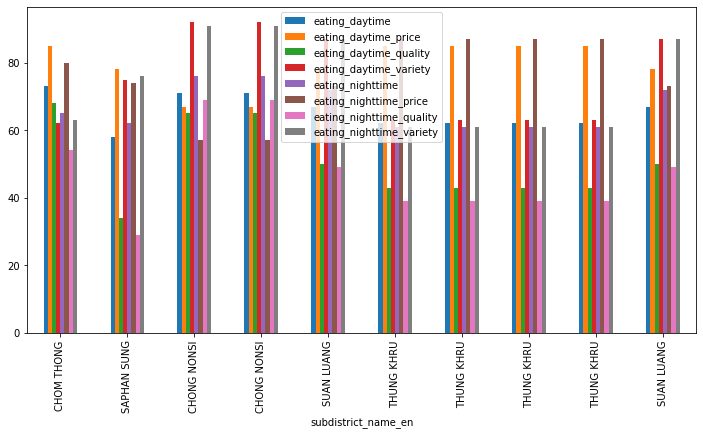

In [ ]:
EB.plot(kind='bar',x='subdistrict_name_en')

bar chart แสดงตัวอย่างของคะแนนการเข้าถึงสถานที่ต่างๆ โดยการเดิน แต่ละย่าน 10 ย่าน

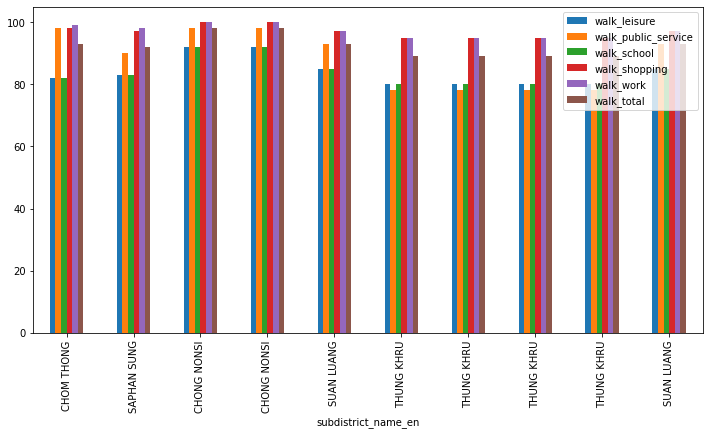

In [ ]:
WB.plot(kind='bar',x='subdistrict_name_en')

bar chart แสดงตัวอย่างของคะแนนการเข้าถึงสถานที่ต่างๆ โดยรถไฟ บัสและเรือ แต่ละย่าน 10 ย่าน

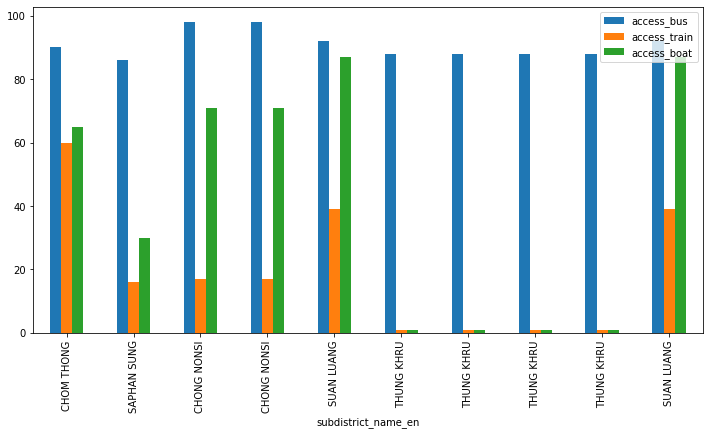

In [ ]:
TBB.plot(kind='bar',x='subdistrict_name_en')

##Presentation,Dashboard Link


*   Presentation : https://www.canva.com/design/DAFRWn5FOYM/mqb3N0eJiYXXdNSx5QdMoA/edit
*   Dashboard : https://datastudio.google.com/reporting/11b91c6d-90e5-4633-86c1-f7aa284492d9/page/Hy06C?fbclid=IwAR19L6QVkD82lmeMRVazW3kC0JCiDymxc7DDNHWUpUePN9ly-gqiJMFRYTU

